In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 키오스크 군집화

## 파일 불러오기

In [89]:
kio_data=pd.read_csv("data/final_data.csv")
kio_data=kio_data.iloc[:, 1:]
kio_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,2,0,0,2,0,0,1,05-16,14,일
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0,0,1,0,2,0,0,05-16,15,일
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,0,3,3,0,0,0,05-16,15,일
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,3,0,0,0,0,0,0,05-16,15,일
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,2,0,0,2,0,0,0,05-16,16,일
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2021-05-19 17:00:00,여자,청년,서울,중립,분식,한식,중식,25.9,0.0,...,0,0,0,0,0,1,0,05-19,17,수
381,2021-05-19 19:00:00,여자,청년,서울,행복,양식,일식,한식,24.1,0.0,...,0,0,0,2,0,0,0,05-19,19,수
382,2021-05-19 20:00:00,여자,청년,서울,행복,일식,분식,한식,22.1,0.0,...,3,0,0,0,0,0,0,05-19,20,수
383,2021-05-19 20:00:00,여자,청년,서울,행복,양식,중식,분식,22.1,0.0,...,0,0,0,0,0,0,2,05-19,20,수


In [90]:
kio_data["요일"].value_counts()

화    148
일    147
월     47
수     43
Name: 요일, dtype: int64

## 휴일=0 ,평일=1

In [91]:
for i in range(len(kio_data)):
    if kio_data.loc[i,"요일"]=="일":
        kio_data.loc[i,"휴일"]=0
    else:
        kio_data.loc[i,"휴일"]=1
        

In [92]:
kio_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일
0,2021-05-16 14:00:00,남자,청년,수도권,행복,한식,일식,중식,17.5,1.6,...,0,0,2,0,0,1,05-16,14,일,0.0
1,2021-05-16 15:00:00,여자,중장년,서울,분노,한식,중식,일식,18.5,1.4,...,0,1,0,2,0,0,05-16,15,일,0.0
2,2021-05-16 15:00:00,남자,청년,서울,중립,일식,양식,한식,18.5,1.4,...,0,3,3,0,0,0,05-16,15,일,0.0
3,2021-05-16 15:00:00,여자,청년,서울,행복,일식,한식,분식,18.5,1.4,...,0,0,0,0,0,0,05-16,15,일,0.0
4,2021-05-16 16:00:00,남자,청년,경상도,행복,양식,일식,분식,20.6,2.6,...,0,0,2,0,0,0,05-16,16,일,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2021-05-19 17:00:00,여자,청년,서울,중립,분식,한식,중식,25.9,0.0,...,0,0,0,0,1,0,05-19,17,수,1.0
381,2021-05-19 19:00:00,여자,청년,서울,행복,양식,일식,한식,24.1,0.0,...,0,0,2,0,0,0,05-19,19,수,1.0
382,2021-05-19 20:00:00,여자,청년,서울,행복,일식,분식,한식,22.1,0.0,...,0,0,0,0,0,0,05-19,20,수,1.0
383,2021-05-19 20:00:00,여자,청년,서울,행복,양식,중식,분식,22.1,0.0,...,0,0,0,0,0,2,05-19,20,수,1.0


## 요일 변경

In [93]:
weekday = {'월': 0, '화': 1, '수': 2, '목':3, '금':4, '토':5, '일':6}

kio_data.replace({'요일':weekday}, inplace=True)

## 성별 변경

In [94]:
sex = {"남자": 0,"여자": 1}

kio_data.replace({'성별':sex}, inplace=True)

## 나이 변경

In [95]:
age = {"청소년": 0,"청년": 1,"중장년": 2,"노년":3}

kio_data.replace({'연령대': age}, inplace=True)

## 감정 변경

In [96]:
feel = {"행복": 0,"우울": 1,"분노": 2,"중립":3}

kio_data.replace({'기분': feel}, inplace=True)

## 강수량 변경

In [97]:
for i in range(len(kio_data)):
    if kio_data.loc[i,"강수량"]==0:
        kio_data.loc[i,"강수량"]=0
    else:
        kio_data.loc[i,"강수량"]=1

In [98]:
## 온도 변경 
# kio_data["기온"]=pd.qcut(kio_data["기온"],4,labels=[0,1,2,3])

## 전운량 맑음,구름조금 ,흐림 으로 변경

In [99]:
kio_data.loc[(kio_data['전운량']>=0) & (kio_data['전운량']<=5), '전운량']=0 

In [100]:
kio_data.loc[(kio_data['전운량']>=6) & (kio_data['전운량']<=8), '전운량']=1

In [101]:
kio_data.loc[(kio_data['전운량']>=9) & (kio_data['전운량']<=10), '전운량']=2

In [102]:
kio_data

,시간대,성별,연령대,지역,기분,1순위,2순위,3순위,기온,강수량,...,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,날짜,시간,요일,휴일
0,2021-05-16 14:00:00,0,1,수도권,0,한식,일식,중식,17.5,1.0,...,0,0,2,0,0,1,05-16,14,6,0.0
1,2021-05-16 15:00:00,1,2,서울,2,한식,중식,일식,18.5,1.0,...,0,1,0,2,0,0,05-16,15,6,0.0
2,2021-05-16 15:00:00,0,1,서울,3,일식,양식,한식,18.5,1.0,...,0,3,3,0,0,0,05-16,15,6,0.0
3,2021-05-16 15:00:00,1,1,서울,0,일식,한식,분식,18.5,1.0,...,0,0,0,0,0,0,05-16,15,6,0.0
4,2021-05-16 16:00:00,0,1,경상도,0,양식,일식,분식,20.6,1.0,...,0,0,2,0,0,0,05-16,16,6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,2021-05-19 17:00:00,1,1,서울,3,분식,한식,중식,25.9,0.0,...,0,0,0,0,1,0,05-19,17,2,1.0
381,2021-05-19 19:00:00,1,1,서울,0,양식,일식,한식,24.1,0.0,...,0,0,2,0,0,0,05-19,19,2,1.0
382,2021-05-19 20:00:00,1,1,서울,0,일식,분식,한식,22.1,0.0,...,0,0,0,0,0,0,05-19,20,2,1.0
383,2021-05-19 20:00:00,1,1,서울,0,양식,중식,분식,22.1,0.0,...,0,0,0,0,0,2,05-19,20,2,1.0


## 클러스터용 자료

In [103]:
cluster_data=kio_data[["성별","연령대","기분","강수량","전운량","기온","기압"]]

In [104]:
cluster_data

,성별,연령대,기분,강수량,전운량,기온,기압
0,0,1,0,1.0,2,17.5,993.6
1,1,2,2,1.0,2,18.5,989.6
2,0,1,3,1.0,2,18.5,989.6
3,1,1,0,1.0,2,18.5,989.6
4,0,1,0,1.0,2,20.6,990.5
...,...,...,...,...,...,...,...
380,1,1,3,0.0,0,25.9,1000.6
381,1,1,0,0.0,0,24.1,1000.1
382,1,1,0,0.0,0,22.1,1001.1
383,1,1,0,0.0,0,22.1,1001.1


## 여려 종류 클러스터용 자료나누기

In [105]:
cluster_data1=cluster_data

In [106]:
cluster_data2=cluster_data
cluster_data3=cluster_data

## 피쳐간 상관관계

In [107]:
cluster_data.corr()

,성별,연령대,기분,강수량,전운량,기온,기압
성별,1.000000,0.129912,-0.132459,-0.275014,-0.303348,0.124421,0.291980
연령대,0.129912,1.000000,-0.142322,-0.334921,-0.248121,0.035567,0.285061
기분,-0.132459,-0.142322,1.000000,0.196908,0.169647,-0.029478,-0.176302
강수량,-0.275014,-0.334921,0.196908,1.000000,0.828576,-0.415104,-0.851337
전운량,-0.303348,-0.248121,0.169647,0.828576,1.000000,-0.537684,-0.797523
기온,0.124421,0.035567,-0.029478,-0.415104,-0.537684,1.000000,0.200570
기압,0.291980,0.285061,-0.176302,-0.851337,-0.797523,0.200570,1.000000


## 군집 최적 k 값 구하기

In [139]:
inertia_arr = []
k_range = range (2,50)

for k in k_range :
    
    Kmeans = KMeans(n_clusters=k, random_state=200)
    Kmeans.fit(cluster_data)
    interia = Kmeans.inertia_
    
    print('k :',k, 'inertia :', interia)
    
    inertia_arr.append(interia)

inertia_arr = np.array(inertia_arr)

k : 2 inertia : 6811.56203648326
k : 3 inertia : 4513.403833534817
k : 4 inertia : 2988.777039476605
k : 5 inertia : 2198.605304952635
k : 6 inertia : 1927.9959473258627
k : 7 inertia : 1721.8530455498617
k : 8 inertia : 1528.0224581736195
k : 9 inertia : 1405.3592069603294
k : 10 inertia : 1299.2376748168444
k : 11 inertia : 1221.815314529191
k : 12 inertia : 1152.0375914473057
k : 13 inertia : 1078.4765519252549
k : 14 inertia : 1040.6277687568631
k : 15 inertia : 956.67031906806
k : 16 inertia : 897.3671717690362
k : 17 inertia : 850.1485136330592
k : 18 inertia : 815.4132257864367
k : 19 inertia : 778.6630368577589
k : 20 inertia : 742.3281358255803
k : 21 inertia : 697.512657619146
k : 22 inertia : 676.1205382903746
k : 23 inertia : 653.3641378288055
k : 24 inertia : 627.789584515522
k : 25 inertia : 597.0923619145005
k : 26 inertia : 585.6320278503285
k : 27 inertia : 556.5180148760954
k : 28 inertia : 537.6572163331768
k : 29 inertia : 532.7481348803615
k : 30 inertia : 511.6739

## Elbow Method

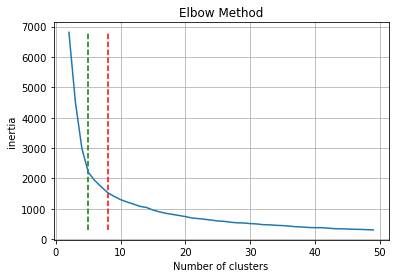

In [141]:
plt.plot(k_range, inertia_arr)
plt.vlines(5, ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0003, linestyles='--',colors="g")
plt.vlines(8, ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0003, linestyles='--',colors="r")

plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("inertia")
plt.grid()
plt.show()

## 군집 실루엣

In [142]:
from sklearn.metrics import silhouette_score

k_range = range(2,20)

best_n = -1
best_silhouette_score = -1

for k in k_range :
    
    kmeans = KMeans(n_clusters=k, random_state=200)
    kmeans.fit(cluster_data)
    clusters = kmeans.predict(cluster_data)
    
    score = silhouette_score(cluster_data3, clusters)
    print("k :",k, "score :", score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score = score

print('best n :',best_n,'best score :', best_silhouette_score)

k : 2 score : 0.553762992170407
k : 3 score : 0.516712150900886
k : 4 score : 0.556921906689872
k : 5 score : 0.5347392418341363
k : 6 score : 0.46443799736334335
k : 7 score : 0.46170108044936714
k : 8 score : 0.43015138815379594
k : 9 score : 0.4287662717442135
k : 10 score : 0.37448055586662315
k : 11 score : 0.4004080015621969
k : 12 score : 0.38077553890731747
k : 13 score : 0.38846999589451947
k : 14 score : 0.38977225244597996
k : 15 score : 0.3948836794520197
k : 16 score : 0.3959865315681479
k : 17 score : 0.4005054031760002
k : 18 score : 0.40844098896957126
k : 19 score : 0.403565646170766
best n : 4 best score : 0.556921906689872


In [110]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[22  8  8 23 18 18 13 42 13 42 42 18 18 34 23  8 23 23 23 23  8 23 23 22
 22 12 22 12 35 34  4 34 42  4 34 34  4 34  4 34  4 42  4 42 34 13 18 34
  4 34  4 34  4 13  4  4 18 13  4 34  4 34  4 34  4 34 34  4  4 13  4 13
 34  4  4 13 34  4 12 23  8 23  8  8  8 23  8 23 35 34 34 42 42 13 42 42
 34  4  4  4  4  4 13  8  8 22 22 13 13 13 23  1  1  1 20 20  1 20  1  1
 20 20  1  1  1  1  1 20  1 20  1 20 20 20 26 26 22  1  1 12  1 26 12 22
 12 12 23 12 45 26 45  9  9  9  9  9  9  9 26 45  2  9 26  9 17 17 36 17
 27 36 27 36 36 27 27 36 17 17 17 27 27 45 17 26 27  5 26 17 17 17 17  2
 36 21 21 11  5 39 39  5  5 39 11 21 11  5 33 41 48 48 48 10 48 48 41 10
 48 48 10 48 10 10 10 10 41 48 48 41 48 10 33 28 33 33 44 24  3 24 24 24
 44 24 44 24 44 44 24 44 44 33 28  0 28  3 44 24  3  3  3 24 44 24  7  6
 16  7  7  6  7 31  7  7  7 16  7  7 16 38 16 31  7  6  7  7 16 38 38 16
 38 31 31  6  7  7  7 43  6  7 38  6  7  6 31 38 38 31  7 16 43 43 43 43
  7 38  7 16  7  7 38 31 31  6

## 50개 군집시 군집간 거리

In [111]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(kmeans.cluster_centers_, metric='euclidean')), columns=set(kmeans.labels_))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.000000,12.241587,7.268425,4.102845,13.704714,4.564537,3.252523,2.155140,14.479394,8.980359,...,5.686387,4.107919,3.857136,13.474068,5.530118,3.992094,9.773210,7.110829,4.580666,2.892160
1,12.241587,0.000000,9.024353,10.443907,3.454297,11.155529,12.966545,12.703478,3.691534,6.067585,...,11.788907,11.559682,10.155765,3.730727,10.345652,9.990116,4.245609,14.351485,9.931116,9.917069
2,7.268425,9.024353,0.000000,8.865852,11.091922,3.544714,8.722896,8.642500,10.611363,3.427206,...,4.109947,9.791408,6.556485,10.929616,9.963142,8.342089,4.974497,5.852682,3.035210,6.415326
3,4.102845,10.443907,8.865852,0.000000,11.245886,7.375975,3.955659,3.696734,12.554866,9.250576,...,8.051397,1.571447,3.478625,10.956847,1.603392,1.059517,9.334468,10.651161,6.784234,2.880979
4,13.704714,3.454297,11.091922,11.245886,0.000000,13.080165,13.627924,13.942546,2.856995,8.365646,...,13.149981,12.429234,10.900254,1.326068,11.000283,11.029165,6.815650,16.425266,11.971511,11.274476
5,4.564537,11.155529,3.544714,7.375975,13.080165,0.000000,6.452144,6.134670,13.141698,6.147146,...,2.660827,7.924224,5.223265,12.897383,8.719358,6.978148,7.636303,4.348818,1.990603,4.787915
6,3.252523,12.966545,8.722896,3.955659,13.627924,6.452144,0.000000,3.287495,14.641746,10.235101,...,6.238068,4.137953,3.062296,13.342579,5.368087,4.455708,10.944355,9.029897,6.620340,4.060057
7,2.155140,12.703478,8.642500,3.696734,13.942546,6.134670,3.287495,0.000000,15.039204,10.120764,...,7.042356,3.058261,4.327958,13.775823,4.924107,3.951624,10.681389,8.370549,6.207755,3.503735
8,14.479394,3.691534,10.611363,12.554866,2.856995,13.141698,14.641746,15.039204,0.000000,7.663616,...,13.134224,13.872492,11.750721,2.638971,12.461160,12.164523,6.162502,16.234160,11.968344,12.049159
9,8.980359,6.067585,3.427206,9.250576,8.365646,6.147146,10.235101,10.120764,7.663616,0.000000,...,6.707928,10.379538,7.493028,8.245262,9.965426,8.656937,2.162812,8.918624,5.103802,7.280195


## 50개 군집시 inertia

In [112]:
kmeans.inertia_

307.87580751193326

## 50개 군집시 dendrogram

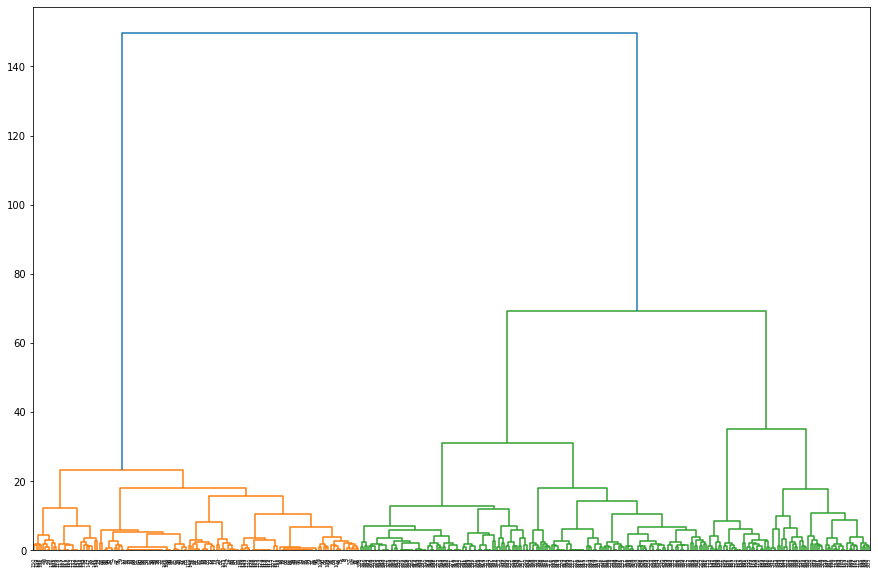

In [113]:
from scipy.cluster.hierarchy import dendrogram, ward

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(cluster_data)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
plt.figure(figsize=(15, 10))
dn = dendrogram(linkage_array)
plt.xticks(rotation=90)
plt.show()

## 6개로 군집 실행

In [114]:
kmeans = KMeans(n_clusters=6) #7 개의 군집으로 분류
kmeans.fit(cluster_data)
sse.append(kmeans.inertia_)

In [115]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[2 0 0 4 4 4 4 0 4 0 0 4 4 4 4 0 4 4 4 4 0 4 4 4 4 0 2 0 0 4 0 4 0 0 4 4 0
 4 0 4 0 0 0 0 4 4 4 4 0 4 0 4 0 4 0 0 4 4 0 4 0 4 0 4 0 4 4 0 0 4 0 4 4 0
 0 4 4 0 0 4 0 4 0 0 0 4 0 4 4 4 4 0 0 4 0 0 4 0 0 0 0 0 4 0 0 2 2 4 4 4 4
 4 4 4 0 0 4 0 4 4 0 0 4 4 4 4 4 0 4 0 4 0 0 0 2 2 4 4 4 0 4 2 0 4 0 2 4 0
 2 2 2 2 2 2 2 2 2 2 2 2 6 2 2 2 2 2 6 6 6 6 6 6 6 6 6 6 2 2 2 6 6 2 2 2 6
 6 2 2 2 2 2 6 6 5 5 5 6 6 6 6 6 6 5 5 5 6 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 1 1 1 1 1 1
 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1
 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 1 1 3 3 6 6 6 6 1
 5 5 5 6 6 5 5 6 5 5 5 5 5 3 3 3 1 1 1 1 1 1 1 1 1 1 1 3 3 1 1 3 1 3 3 1 1
 1 1 1 1 3 3 1 3 1 1 1 1 1 1 1]


## 군집 라벨 붙이기

In [117]:
cluster_data['label'] = kmeans.labels_
cluster_data

<ipython-input-117-f0c77412b47c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['label'] = kmeans.labels_


,성별,연령대,기분,강수량,전운량,기온,기압,label
0,0,1,0,1.0,2,17.5,993.6,2
1,1,2,2,1.0,2,18.5,989.6,0
2,0,1,3,1.0,2,18.5,989.6,0
3,1,1,0,1.0,2,18.5,989.6,4
4,0,1,0,1.0,2,20.6,990.5,4
...,...,...,...,...,...,...,...,...
380,1,1,3,0.0,0,25.9,1000.6,1
381,1,1,0,0.0,0,24.1,1000.1,1
382,1,1,0,0.0,0,22.1,1001.1,1
383,1,1,0,0.0,0,22.1,1001.1,1


## 6개 군집시 군집간거리

In [118]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(kmeans.cluster_centers_, metric='euclidean')), columns=set(kmeans.labels_))
row_dist

,0,1,2,3,4,5,6
0,0.000000,11.026726,6.761167,13.746118,2.602628,15.300846,11.443197
1,11.026726,0.000000,8.513334,3.478257,10.861422,8.762573,6.882906
2,6.761167,8.513334,0.000000,10.004770,6.583827,9.142916,5.375759
3,13.746118,3.478257,10.004770,0.000000,13.668810,6.753745,6.434581
4,2.602628,10.861422,6.583827,13.668810,0.000000,15.138807,11.380683
5,15.300846,8.762573,9.142916,6.753745,15.138807,0.000000,3.971970
6,11.443197,6.882906,5.375759,6.434581,11.380683,3.971970,0.000000


## 각 군집 중심점 값

In [119]:
kmeans.cluster_centers_

array([[ 2.15384615e-01,  4.92307692e-01,  2.89230769e+00,
         1.00000000e+00,  1.98461538e+00,  1.90600000e+01,
         9.90289231e+02],
       [ 4.81927711e-01,  1.66265060e+00,  8.79518072e-01,
        -3.33066907e-16,  3.13253012e-01,  2.24807229e+01,
         1.00031928e+03],
       [ 3.88888889e-01,  1.08333333e+00,  1.13888889e+00,
         6.66666667e-01,  1.83333333e+00,  1.55305556e+01,
         9.95736111e+02],
       [ 6.66666667e-01,  7.30769231e-01,  1.10256410e+00,
        -2.22044605e-16,  5.12820513e-02,  2.15217949e+01,
         1.00350641e+03],
       [ 2.40000000e-01,  6.26666667e-01,  2.93333333e-01,
         1.00000000e+00,  1.98666667e+00,  1.90533333e+01,
         9.90272000e+02],
       [ 4.11764706e-01,  1.11764706e+00,  5.88235294e-01,
         5.88235294e-02,  3.52941176e-01,  1.49176471e+01,
         1.00470000e+03],
       [ 3.54838710e-01,  1.22580645e+00,  1.29032258e+00,
         4.83870968e-01,  1.48387097e+00,  1.57870968e+01,
         1.0010871

## 6개 군집시 inertia

In [120]:
kmeans.inertia_

1721.8530455498612

## 6개 군집시 dendrogram

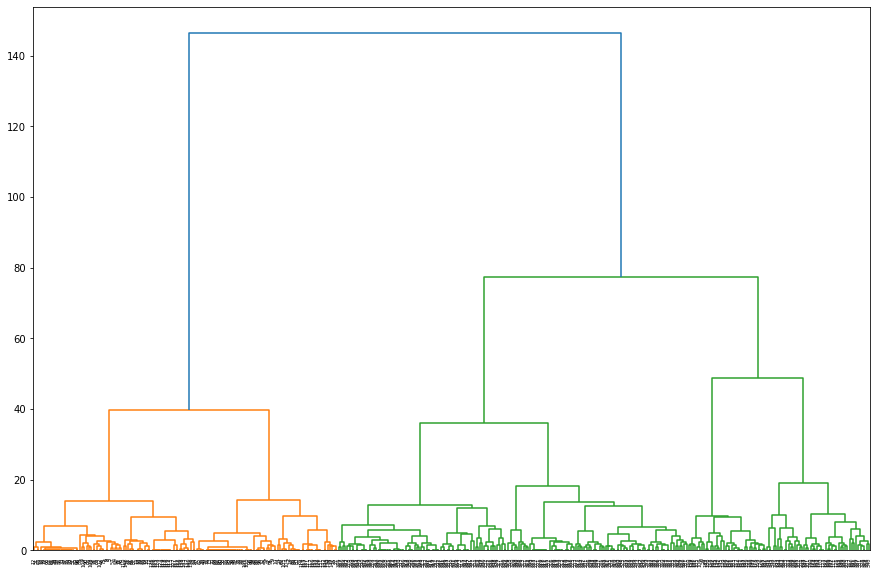

In [121]:
from scipy.cluster.hierarchy import dendrogram, ward

# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(cluster_data)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
plt.figure(figsize=(15, 10))
dn = dendrogram(linkage_array)
plt.xticks(rotation=90)
plt.show()

In [122]:
cluster_data

,성별,연령대,기분,강수량,전운량,기온,기압,label
0,0,1,0,1.0,2,17.5,993.6,2
1,1,2,2,1.0,2,18.5,989.6,0
2,0,1,3,1.0,2,18.5,989.6,0
3,1,1,0,1.0,2,18.5,989.6,4
4,0,1,0,1.0,2,20.6,990.5,4
...,...,...,...,...,...,...,...,...
380,1,1,3,0.0,0,25.9,1000.6,1
381,1,1,0,0.0,0,24.1,1000.1,1
382,1,1,0,0.0,0,22.1,1001.1,1
383,1,1,0,0.0,0,22.1,1001.1,1


## 전쳬 데이터에서 메뉴컬럼만 추출

In [123]:
menu_list = ['불고기', '냉면', '칼국수', '된장찌개', '비빔밥', '김치찌개', '떡볶이', '김밥', '파스타',
'스테이크', '햄버거', '초밥', '우동', '메밀소바', '돈가스', '볶음밥', '짜장면', '짬뽕']


## 추출한 컬럼과 군집 및 라벨링이 된 자료 합치기

In [124]:
kio_menu_result=kio_data[menu_list]
kio_menu_result["label"]=cluster_data["label"]

<ipython-input-124-3c35af1f493b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kio_menu_result["label"]=cluster_data["label"]


In [125]:
kio_menu_result

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,label
0,3,0,0,0,0,3,0,0,0,0,0,2,0,0,2,0,0,1,2
1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0
2,1,0,0,0,0,1,0,0,0,2,0,0,0,3,3,0,0,0,0
3,0,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,0,0,4
4,0,0,0,0,0,0,1,0,0,0,3,2,0,0,2,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,1
381,0,0,0,1,0,0,0,0,0,0,3,0,0,0,2,0,0,0,1
382,0,1,0,0,0,0,2,0,0,0,0,3,0,0,0,0,0,0,1
383,0,0,0,0,0,0,1,1,3,0,0,0,0,0,0,0,0,2,1


## 추천

In [126]:
kio_menu_result.groupby(["label"]).mean().iloc[0].sort_values(ascending=False).head(3)

돈가스     0.800000
초밥      0.769231
스테이크    0.753846
Name: 0, dtype: float64

## AgglomerativeClustering(계층적 클러스터링

## 알맞는 linkages  설정,군집갯수 구하기

In [143]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

linkages = ["single", "average","complete"]
k_range = range(2,11)
k_silhouette_df = pd.DataFrame(k_range, columns=["k"])

for connect in linkages :
    
    k_silhouette = []
    print(connect)
    
    for k in k_range :
        
        clustering = AgglomerativeClustering(n_clusters=k, linkage=connect)
        clusters = clustering.fit_predict(cluster_data3)
        score = silhouette_score(cluster_data3,clusters)
        
        print("k : ",k,"score : ", score)
        
        result = [score]
        k_silhouette.append(result)
        
    score_df = pd.DataFrame(k_silhouette, columns = [connect + '_score'])
    k_silhouette_df = pd.concat([k_silhouette_df, score_df],axis=1)

single
k :  2 score :  0.2015246346183959
k :  3 score :  0.18026593571708804
k :  4 score :  0.4351346280695402
k :  5 score :  0.17203572942068937
k :  6 score :  0.10651839052082578
k :  7 score :  0.07977956859388988
k :  8 score :  0.05487421064236598
k :  9 score :  0.05132806952931399
k :  10 score :  0.008622606969505132
average
k :  2 score :  0.553762992170407
k :  3 score :  0.48806837244691254
k :  4 score :  0.467049092228171
k :  5 score :  0.45281468329824054
k :  6 score :  0.5272513543908814
k :  7 score :  0.5295895516975456
k :  8 score :  0.5073536148684101
k :  9 score :  0.4718541364154665
k :  10 score :  0.3585608296579804
complete
k :  2 score :  0.5455919573110074
k :  3 score :  0.5163797094065852
k :  4 score :  0.4555570452271106
k :  5 score :  0.525232717324127
k :  6 score :  0.5177002164325162
k :  7 score :  0.40746135050592286
k :  8 score :  0.3720444075648011
k :  9 score :  0.3571565974929848
k :  10 score :  0.36285441890164877


## 실루엣 결과 (값이 높을수록 좋음)

In [144]:
k_silhouette_df

,k,single_score,average_score,complete_score
0,2,0.201525,0.553763,0.545592
1,3,0.180266,0.488068,0.516380
2,4,0.435135,0.467049,0.455557
3,5,0.172036,0.452815,0.525233
4,6,0.106518,0.527251,0.517700
5,7,0.079780,0.529590,0.407461
6,8,0.054874,0.507354,0.372044
7,9,0.051328,0.471854,0.357157
8,10,0.008623,0.358561,0.362854


 전체적으로 average_score가 잘나왔고 
 k 값은 7이 가장 적당해보임

## 7로 군집

In [127]:
from sklearn.cluster import AgglomerativeClustering

clustering=AgglomerativeClustering(n_clusters = 7,compute_distances=True, linkage="average").fit(cluster_data1)

In [128]:
clustering

AgglomerativeClustering(compute_distances=True, n_clusters=7)

In [129]:
clustering.labels_

array([3, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 3, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1,
       1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       2, 2, 3, 3, 1, 1, 1, 2, 1, 3, 2, 1, 2, 3, 1, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       3, 3, 3, 4, 4, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 4, 6, 6, 6, 4, 4,
       4, 4, 4, 4, 6, 6, 6, 4, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 5, 5, 5, 5, 5,

In [130]:
clustering.distances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

## 군집된 라벨 달아주기

In [131]:
cluster_data1['label'] = clustering.labels_
cluster_data1

<ipython-input-131-f310ed9894d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data1['label'] = clustering.labels_


,성별,연령대,기분,강수량,전운량,기온,기압,label
0,0,1,0,1.0,2,17.5,993.6,3
1,1,2,2,1.0,2,18.5,989.6,2
2,0,1,3,1.0,2,18.5,989.6,2
3,1,1,0,1.0,2,18.5,989.6,1
4,0,1,0,1.0,2,20.6,990.5,1
...,...,...,...,...,...,...,...,...
380,1,1,3,0.0,0,25.9,1000.6,0
381,1,1,0,0.0,0,24.1,1000.1,0
382,1,1,0,0.0,0,22.1,1001.1,0
383,1,1,0,0.0,0,22.1,1001.1,0


###  군집으로 메뉴 추천 결과

In [132]:
kio_menu_result1=kio_data[menu_list]
kio_menu_result1["label"]=cluster_data1["label"]

<ipython-input-132-2d806f7dc6f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kio_menu_result1["label"]=cluster_data1["label"]


In [133]:
kio_menu_result1

,불고기,냉면,칼국수,된장찌개,비빔밥,김치찌개,떡볶이,김밥,파스타,스테이크,햄버거,초밥,우동,메밀소바,돈가스,볶음밥,짜장면,짬뽕,label
0,3,0,0,0,0,3,0,0,0,0,0,2,0,0,2,0,0,1,3
1,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,2
2,1,0,0,0,0,1,0,0,0,2,0,0,0,3,3,0,0,0,2
3,0,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0,0,3,2,0,0,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,1,0,0
381,0,0,0,1,0,0,0,0,0,0,3,0,0,0,2,0,0,0,0
382,0,1,0,0,0,0,2,0,0,0,0,3,0,0,0,0,0,0,0
383,0,0,0,0,0,0,1,1,3,0,0,0,0,0,0,0,0,2,0


## 계층 클러스터시 결과

In [134]:
kio_menu_result1.groupby(["label"]).mean().iloc[0].sort_values(ascending=False).head(3)

불고기    1.024096
비빔밥    0.927711
초밥     0.710843
Name: 0, dtype: float64

## kmeans 클러스터시 결과

In [135]:
kio_menu_result.groupby(["label"]).mean().iloc[0].sort_values(ascending=False).head(3)

돈가스     0.800000
초밥      0.769231
스테이크    0.753846
Name: 0, dtype: float64

## DBSCAN

In [136]:
cluster_data2

,성별,연령대,기분,강수량,전운량,기온,기압,label
0,0,1,0,1.0,2,17.5,993.6,3
1,1,2,2,1.0,2,18.5,989.6,2
2,0,1,3,1.0,2,18.5,989.6,2
3,1,1,0,1.0,2,18.5,989.6,1
4,0,1,0,1.0,2,20.6,990.5,1
...,...,...,...,...,...,...,...,...
380,1,1,3,0.0,0,25.9,1000.6,0
381,1,1,0,0.0,0,24.1,1000.1,0
382,1,1,0,0.0,0,22.1,1001.1,0
383,1,1,0,0.0,0,22.1,1001.1,0


In [137]:
from sklearn.cluster import DBSCAN
import numpy as np
D_clustering = DBSCAN(eps=1.1, min_samples=2).fit(cluster_data2)


D_clustering

DBSCAN(eps=1.1, min_samples=2)

In [138]:
D_clustering.labels_

array([-1, -1,  0,  1,  1,  1,  1,  2,  1,  2,  2,  1,  1,  1,  1,  0,  1,
        1,  1,  1, -1, -1,  1,  3,  3,  4, -1,  4, -1,  1,  2,  1,  2,  2,
        1,  1,  2,  1,  2,  1,  2,  2,  2,  2,  1,  1,  1,  1,  2,  1,  2,
        1,  2,  1,  2,  2,  1,  1,  2,  1,  2,  1,  2,  1,  2,  1,  1,  2,
        2,  1,  2,  1,  1,  2,  2,  1,  1,  2,  4,  1,  0,  1,  0,  0,  0,
        1,  0,  1, -1,  1,  1,  2,  2,  1,  2,  2,  1,  2,  2,  2,  2,  2,
        1,  0,  0,  5,  5, -1,  1,  1, -1,  6,  6,  6,  7,  7,  6,  7,  6,
        6,  7,  7,  6,  6,  6,  6,  6,  7,  6,  7,  8,  7,  7,  7,  9,  9,
       -1,  8,  8, -1,  8,  9,  7,  8,  7, -1, -1,  4, -1, -1, -1, 10, 10,
       10, 10, 10, 10, 10, -1, -1, -1, 10, -1, 10, 11, 11, 12, -1, 13, 12,
       13, 12, 12, 13, 13, 12, 11, 11, 11, 13, 13, -1, 11, 14, 13, -1, 14,
       11, 11, 11, 11, -1, -1, -1, -1, -1, 15, 16, -1, 15, -1, 16, 17, -1,
       17, 15, -1, 18, 18, 18, 18, 18, 18, 18, 19, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 18